In [1]:
import compartmental
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: <object object at 0x000002D437B3F9B0>


In [2]:
sir_model = {
    "simulation": {
        "n_simulations": 100000,
        "n_executions": 1,
        "n_steps": 130
    },
    "compartiments": {
        "S": { 
            "initial_value": 1,
            "minus_compartiments": "I"
        },
        "I": { 
            "initial_value": "Io",
        },
        "R": { "initial_value": 0 },
    },
    "params": {
        "betta": {
            "min": 0.1,
            "max": 0.4,
            "min_limit": 0.1,
            "max_limit": 0.4
        },
        "mu": {
            "min": 0.01,
            "max": 0.2,
            "min_limit": 0.01,
            "max_limit": 0.2
        },
        "Io": {
            "min": 1e-6,
            "max": 1e-4,
            "min_limit": 1e-7,
            "max_limit": 1e-2
        },
        "To": {
            "type": "int",
            "min": -5,
            "max": 5
        }
    },
    "fixed_params": {
        "K_mean": 1
    },
    "reference": {
        "compartiments" : ["R"],
        "offset": "To"
    },
    "results": {
        "save_percentage": 0.1
    }
}

SirModel = compartmental.GenericModel(sir_model)

def evolve(m, *args, **kargs):
    p_infected = m.betta * m.K_mean * m.I
    
    m.R += m.mu * m.I
    m.I += m.S * p_infected - m.I * m.mu
    m.S -= m.S * p_infected
    
SirModel.evolve = evolve

In [3]:
results = compartmental.util.load_parameters("../sir.data")
weights = numpy.exp(-results[0]/numpy.min(results[0]))

In [4]:
plt.scatter(results[0], weights)

: 

C:\Computation\gpu-compartimental-model\compartmental\util.py:274: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


KeyboardInterrupt: 

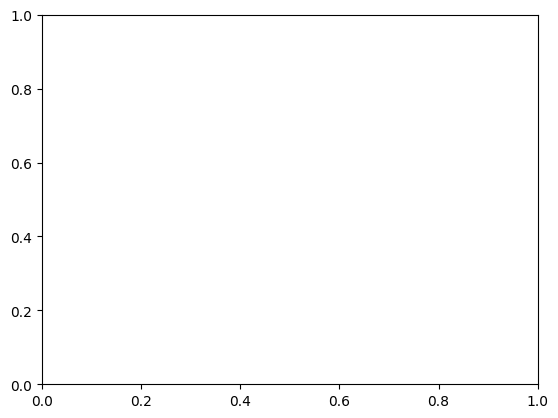

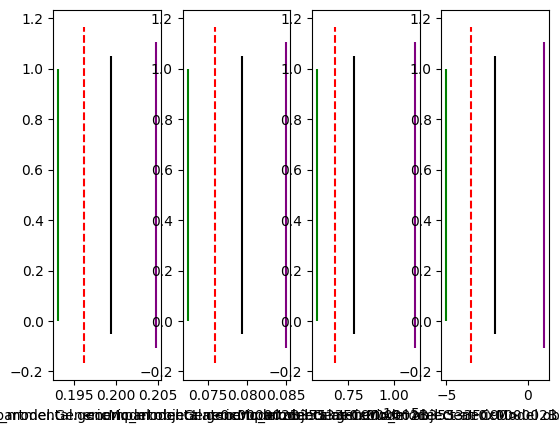

In [5]:
compartmental.util.get_trajecty_selector(SirModel, results, weights)
